Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = "NONE"

# Numerical errors (very short intro)
Computers are finite. Therefore, they cannot represent the whole range of integer or real numbers. This implies some intrinsic errors when performing numerical computations, errors that one must be aware and control as best as possible. Those errors could appear when you represent a very large (overflow) or very small (underflow) numbers, or when the computer numbers available are different from the one you want to represent (truncation/round-off), or when you perform computations among numbers that are very different, etc. Fortunately, there is a standard that allow us to have the same behavior (and errors) on almost all platforms, the IEEE754 standard. In the following we will explore some of the aspect associated with the integer but specially floating point arithmetic.

# Binary representation
Every number is represented as a binary one. Check
- https://bartaz.github.io/ieee754-visualization/
- https://float.exposed/0x44c00000
- https://www.h-schmidt.net/FloatConverter/IEEE754.html
- https://en.wikipedia.org/wiki/Floating-point_arithmetic
- https://trekhleb.dev/blog/2021/binary-floating-point/

having finite memory, this also means that:
- You have a finite range of integer and float number to represent
- The density of the float numbers is not uniform (is a power law). In single precision, you have almost half of the whole available numbers between 0 and 1, and only 8000 between 1023 and 1024. So NORMALIZE your models!
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/FloatingPointPrecisionAugmented.png">
- In general, single precision numbers have a relative precision of about $10^{-6}$, while double precision numbers have a relative precision of $10^{-15}$.

If you want to learn more, check : https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html

Let's start now to check the typical errors, the underflow and the underflow

# Underflow and overflow
Underflows means representing a number smaller thatn the available ones. This usually rounds to zero (good). Overflows means representing a numer larger than the available ones This usually rounds to `inf` (bad) or , for integers in languages like C++, to negative numbers (very bad). You can check the possible range here: https://en.cppreference.com/w/cpp/language/types

NOTE: In python, integers could have arbitrary precision. This removes the problem of overflow, but makes them slow when they have to be simulated in software.
  


[2.6584560e+36 5.3169120e+36 1.0633824e+37 2.1267648e+37 4.2535296e+37
 8.5070592e+37 1.7014118e+38           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf]
[3.59e-43 1.79e-43 8.97e-44 4.48e-44 2.24e-44 1.12e-44 5.61e-45 2.80e-45
 1.40e-45 0.00e+00]


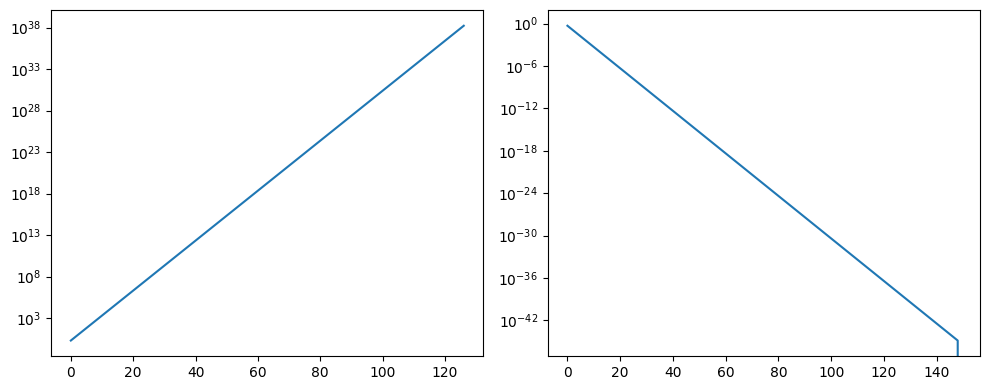

In [6]:
# Overflow, underflow
# EXERCISE:  Find the N that produces overflow and underflow, for both np.float32 and np.float64
# REVISAR VIDEO DE LA CLASE PARA ENTENDER ESTE EJERCICIO

import numpy as np
under = 1.
over = 1.
N = 150
odata = np.zeros(N, dtype=np.float32)
udata = np.zeros(N, dtype=np.float32)
for ii in range(N):
    under /= 2.0
    over *= 2.0
    odata[ii] = over
    udata[ii] = under
    #print(f"{ii:25d}\t{udata[ii]:25.16e}\t{odata[ii]:25.16e}\n")

import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].semilogy(np.arange(N), odata)
axes[1].semilogy(udata)
fig.tight_layout()

print(odata[-30:]) #  Imprime los últimos treinta números del arreglo 'odata'. Notemos donde el error se trunca y empieza a ser directamente infinito (VER VIDEO DE CLASE PARA ENTENDER BIEN ESTO)
print(udata[-10:])

# Machine precision
You can also compute/verify the machine precision $\epsilon_m$ of your machine according to different types. The machine precision is a number that basically rounds to zero and in opertation. It can be represented as $1_c + \epsilon_m = 1_c$, where $1_c$ is the computational representation of the number 1. Actually, that means than any real number $x$ is actually represented as
 $$x_c = x(1+\epsilon), |\epsilon| \le \epsilon_m .$$

Implement the following algorithm to compute it and report your results:
```
eps = 1.0
begin do N times
    eps = eps/2.0
    one = 1.0 + eps
    print
```
What do you obtain for `np.float32`, `np.float32`, and `np.float64`?

# Practical example: Series expansion of $e^{-x}$
The function $e^{-x}$ can be expanded as
$$e^{-x} = \sum_{i=0}^{\infty} (-1)^i \frac{x^i}{i!} = 1 -  x + \frac{x^2}{2} - \frac{x^3}{6} + \ldots \ (|x| < \infty)$$

This is a great expansion, valid for all finite values of $x$. But, **what numerical problems do you see?**

Implement a function that receives $x$ and $N$ (max number of terms), and saves the iteration value of the series as a function of $i$ in a file called `sumdata.txt`. Then load the data and plot it. Use $N = 10000$ and $x=1.8766$. You will need to implement also a factorial function.

In [11]:
# use fout.write(f"...") to save the data
def exp_expansion(x, N, fname):
    """Add docs here"""
    total = 0.0
    fout = open(fname, "w")
    # YOUR CODE HERE
    # raise NotImplementedError()
    #Solución profesor:
    for ii in range(0, N+1):
        term = np.power(-1.0, ii)*np.power(x, ii)/factorial(ii)
        total += term
        fout.write(f"{ii:25d}\t{total:25.16e}\n")
    fout.close()

def factorial(n):
    """Add docs here"""
    result = 1.0
    for ii in range(1,n+1):
        result *= ii
    return result

# Call the function
exp_expansion(x=1.8766, N=10000, fname="sumdata.txt")


<ipython-input-11-2d4f65354a2b>:10: RuntimeWarning: overflow encountered in power
  term = np.power(-1.0, ii)*np.power(x, ii)/factorial(ii)
<ipython-input-11-2d4f65354a2b>:10: RuntimeWarning: invalid value encountered in double_scalars
  term = np.power(-1.0, ii)*np.power(x, ii)/factorial(ii)


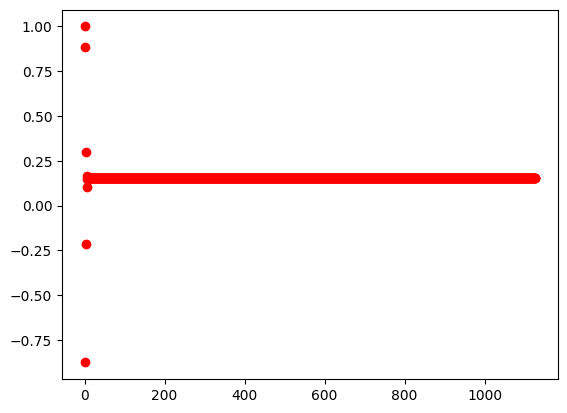

In [12]:
%matplotlib inline
# Plot the data

import matplotlib.pyplot as plt
import numpy as np
x, y = np.loadtxt('sumdata.txt', unpack = True)
plt.plot(x, y, 'ro')

As you can see, there are many problems with this approach. When doing computational tasks, you cannot think that  you are doing maths, you need to think also about the computer.

Now try to avoid the intrinsic overflows, underflows (and substractive cancelations) by reworking the sum term in a recurrent way: if
$$a_i = (-1)^i \frac{x^i}{i!}$$
how could you write $a_{i+1}$ as a function of $a_i$? Thin about it and then check the next cell.


$$a_{i+1} = \frac{-x a_i}{i+1}$$


Now your task is to implement a second version using the recurrence function and compare the results with the first one. Write a function that prints `i expansion1 expansion2` and plot the. Is there any advantage on using the new form?

In [ ]:
# use fout.write(f"...") to save the data
def exp_expansion_new(x, N, fname):
    """Add docs here"""
    total = 0.0
    a_i = 1.0
    total2 = 0.0
    fout = open(fname, "w")
    # YOUR CODE HERE
    # VER VIDEO DE CLASE, EL PROFESOR SOLUCIONA EL EJERCICIO
    raise NotImplementedError()
    fout.close()

# Call the NEW function
exp_expansion_new(x=1.8766, N=10000, fname="sumdatanew.txt")

In [ ]:
%matplotlib notebook
# Plot the data

import matplotlib.pyplot as plt
import numpy as np
x, y, z = np.loadtxt('sumdatanew.txt', unpack = True)
plt.plot(x, y, 'ro')
plt.plot(x, z, 'b-')